In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import time

Load data

(2, 224, 224, 3)

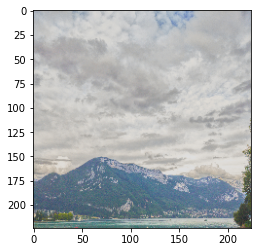

In [2]:
#img = cv2.imread("C:/Users/maart/AppData/Roaming/Microsoft/Windows/Libraries/CameraRoll.library-ms/WIN_20210315_16_15_03_Pro.jpg")
img = cv2.imread("C:/Users/maart/OneDrive/Persoonlijk/Pictures/WIN_20210315_16_15_03_Pro.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("C:/Users/maart/OneDrive/Persoonlijk/Pictures/20200715_193853-01.jpeg", cv2.IMREAD_UNCHANGED)

# Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize
img = cv2.resize(img, (224, 224))
img = img.reshape(224,224,3)
img2 = cv2.resize(img2, (224, 224))
img2 = img2.reshape(224,224,3)

# In array
test_array = np.array([img, img2])

# Show
plt.imshow(img2)
test_array.shape

Load VGG16

In [3]:
# Import VGG16 network with the weights of the imagenet dataset
vgg16 = tf.keras.applications.vgg16.VGG16(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=1000,
    classifier_activation='softmax'
)

In [4]:
vgg16.compile("adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
res = vgg16.predict(np.array([tf.keras.applications.vgg16.preprocess_input(img2)]))
res = tf.keras.applications.vgg16.decode_predictions(res)
res

[[('n09332890', 'lakeside', 0.34450322),
  ('n09468604', 'valley', 0.08296829),
  ('n09193705', 'alp', 0.06298218),
  ('n09428293', 'seashore', 0.05407315),
  ('n09472597', 'volcano', 0.05379989)]]

Classification of live capture

[[('n03584829', 'iron', 0.04741395), ('n03125729', 'cradle', 0.029663391), ('n04517823', 'vacuum', 0.026898848)]]


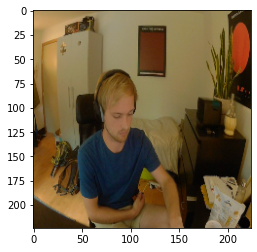

In [17]:
from IPython.display import clear_output

# Open webcam
cap = cv2.VideoCapture(0)

# Check if webcam is opened correctly
if not cap.isOpened():
    raise IOError("cannot open webcam")

# Select and use frames
frame_rate = 10
prev = 0
while True:
    # Initialize and rezize
    time_elapsed = time.time() - prev
    ret, frame = cap.read()
    frame = cv2.resize(frame, (224, 224))
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Preprocess and predict frame every 10 fps
    if time_elapsed > 1./frame_rate:
        prev = time.time()
        
        # Preprocess and predict frame
        prep_frame = tf.keras.applications.vgg16.preprocess_input(np.array([frame_rgb]))
        y_pred = vgg16.predict(prep_frame)
        res = tf.keras.applications.vgg16.decode_predictions(y_pred, top=3)
        
        # Clear output and predict frame
        clear_output(wait=True)
        plt.imshow(frame_rgb)
        print(res)
    
    # Show stream
    # Set text on frame
    cv2.putText(frame, res[0][0][1],(0,10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),1)
    cv2.imshow("webcam", frame)
    
    # Break on Esc key
    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()  